In [1]:
import quandl as q
import numpy as np
import pandas as pd
import datetime
q.ApiConfig.api_key = '1wZCgHH8MyaewgSQKpng'

In [68]:
df1=q.get("WIKI/AMZN")

In [78]:
df1.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291.0,0.0,1.0,1586.45,1590.00,1563.17,1581.86,4667291.0
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737.0,0.0,1.0,1565.47,1573.85,1542.40,1544.10,6177737.0
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966.0,0.0,1.0,1539.01,1549.02,1495.36,1495.56,7843966.0
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618.0,0.0,1.0,1530.00,1556.99,1499.25,1555.86,5547618.0
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279.0,0.0,1.0,1572.40,1575.96,1482.32,1497.05,6793279.0


In [4]:
#importing Libraries for using the model.
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing,cross_validation,svm

E:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
#Choosing Adj. Close for the prediction.
df=df[['Adj. Close']]

In [6]:
#declaring a variable for the days to be predicted.
forecast_out=int(30)
df['Prediction']=df[['Adj. Close']].shift(-forecast_out)

In [35]:
print(df.tail(30))

            Adj. Close  Prediction
Date                              
2018-02-13     1414.51         NaN
2018-02-14     1451.05         NaN
2018-02-15     1461.76         NaN
2018-02-16     1448.69         NaN
2018-02-20     1468.35         NaN
2018-02-21     1482.92         NaN
2018-02-22     1484.76         NaN
2018-02-23     1500.00         NaN
2018-02-26     1521.95         NaN
2018-02-27     1511.98         NaN
2018-02-28     1512.45         NaN
2018-03-01     1493.45         NaN
2018-03-02     1500.25         NaN
2018-03-05     1523.61         NaN
2018-03-06     1537.64         NaN
2018-03-07     1545.00         NaN
2018-03-08     1551.86         NaN
2018-03-09     1578.89         NaN
2018-03-12     1598.39         NaN
2018-03-13     1588.18         NaN
2018-03-14     1591.00         NaN
2018-03-15     1582.32         NaN
2018-03-16     1571.68         NaN
2018-03-19     1544.93         NaN
2018-03-20     1586.51         NaN
2018-03-21     1581.86         NaN
2018-03-22     1544.

In [51]:
X=np.array(df.drop(['Prediction'],1))
X
X=preprocessing.scale(X)


In [52]:
X_forecast=X[-forecast_out:]
X=X[:-forecast_out]


In [53]:
y=np.array(df['Prediction'])
y=y[:-forecast_out]

In [54]:
#Linear Regression
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2)

In [55]:
print("training data for X is :\n",X_train)
print("testing data for X is :\n",X_test)
print("training data for y is :\n",y_train)
print("testing data for y is :\n",y_train)

training data for X is :
 [[-0.42258264]
 [-0.47493323]
 [-0.64324779]
 ...
 [ 0.65358586]
 [ 0.34113267]
 [-0.58265123]]
testing data for X is :
 [[ 0.33559593]
 [ 1.67435145]
 [-0.58385796]
 ...
 [-0.16963167]
 [ 2.27221298]
 [-0.5146487 ]]
training data for y is :
 [ 76.5         58.5         14.69833333 ... 385.11       325.69
  32.61      ]
testing data for y is :
 [ 76.5         58.5         14.69833333 ... 385.11       325.69
  32.61      ]


In [56]:
#Training
clf=LinearRegression()
clf.fit(X_train,y_train)
confidence=clf.score(X_test, y_test)
print("Confidence or accuracy is :",confidence*100,'%')

Confidence or accuracy is : 98.70263469005953 %


In [77]:
forecast_prediction=clf.predict(X_forecast)
print(forecast_prediction)
df4=pd.DataFrame({'Future 30 days prediction $':forecast_prediction})
df4

[1503.26540878 1542.18928809 1553.59801134 1539.67532106 1560.61794469
 1576.13849536 1578.09853745 1594.3327991  1617.71482293 1607.09437748
 1607.59504041 1587.35547536 1594.59910917 1619.48312177 1634.4284427
 1642.26861106 1649.57615928 1678.36960366 1699.14178885 1688.26568573
 1691.26966328 1682.02337778 1670.68922135 1642.19404424 1686.48673449
 1681.53336725 1641.30989482 1589.60313232 1653.83712034 1591.19034031]


,Future 30 days prediction $
0,1503.265409
1,1542.189288
2,1553.598011
3,1539.675321
4,1560.617945
5,1576.138495
6,1578.098537
7,1594.332799
8,1617.714823
9,1607.094377


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Price')

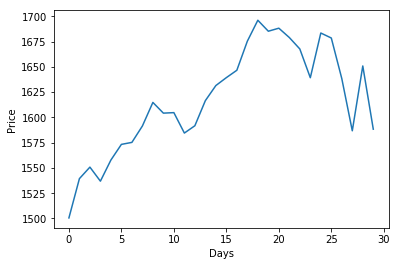

In [19]:
plt.plot(forecast_prediction)
plt.xlabel('Days')
plt.ylabel('Price')

In [28]:
y_pred=clf.predict(X_test)
df2=pd.DataFrame({'Actual Value of y test':y_test,'Predicted value of y being predicted':y_pred})

In [29]:
df2

,Actual Value of y test,Predicted value of y being predicted
0,302.410000,292.211917
1,150.730000,133.540418
2,30.060000,39.026517
3,466.370000,491.585319
4,12.190000,9.882338
5,84.090000,79.600828
6,72.080000,87.171296
7,71.350000,61.578433
8,52.550000,91.881574
9,183.870000,176.305061


In [27]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
print("The mean Square error is :",mean_squared_error(y_test,y_pred))
print("The Root mean Square error is :",np.sqrt(mean_squared_error(y_test,y_pred)))
print('The Efficiency of the model is: %.2f' % r2_score(y_test,y_pred))

The mean Square error is : 868.4009124808845
The Root mean Square error is : 29.4686428679857
The Efficiency of the model is: 0.99
